## Gyakorlás: London légszennyezettsége

Az [openair.txt](openair.txt) fájl London légszennyezettségéről tartalmaz adatokat.
- Töltsük be a fájlt DataFrame-be!
- Az értékek hány százaléka null az egyes oszlopokban?
- Írjuk ki az oszlopok minimális, maximális és átlagos értékét!
- Ábrázoljuk az 1. heti szén-monoxid (CO) koncentrációt!
- Adjuk meg, hogy mennyi az átlagos szén-monoxid ill. szálló por (PM10) koncentráció az év hónapjaiban!
- Adjuk meg, hogy mennyi az átlagos szén-monoxid ill. szálló por (PM10) koncentráció a hét napjain!

In [1]:
import pandas as pd

In [4]:
# Adatok betöltése DataFrame-be.
df = pd.read_csv('openair.txt')
df

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
0,01/01/1998 00:00,0.60,280.0,285.0,39.0,1.0,29.0,4.7225,3.372500,NaN
1,01/01/1998 01:00,2.16,230.0,NaN,NaN,NaN,37.0,NaN,NaN,NaN
2,01/01/1998 02:00,2.76,190.0,NaN,NaN,3.0,34.0,6.8300,9.602500,NaN
3,01/01/1998 03:00,2.16,170.0,493.0,52.0,3.0,35.0,7.6625,10.217500,NaN
4,01/01/1998 04:00,2.40,180.0,468.0,78.0,2.0,34.0,8.0700,8.912500,NaN
...,...,...,...,...,...,...,...,...,...,...
65528,23/06/2005 08:00,1.50,260.0,388.0,145.0,6.0,48.0,NaN,1.637931,26.0
65529,23/06/2005 09:00,1.50,210.0,404.0,168.0,7.0,58.0,NaN,1.293103,34.0
65530,23/06/2005 10:00,2.60,240.0,387.0,175.0,10.0,55.0,NaN,1.293103,34.0
65531,23/06/2005 11:00,3.10,220.0,312.0,125.0,15.0,52.0,NaN,1.293103,33.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65533 entries, 0 to 65532
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    65533 non-null  object 
 1   ws      64907 non-null  float64
 2   wd      65314 non-null  float64
 3   nox     63110 non-null  float64
 4   no2     63095 non-null  float64
 5   o3      62947 non-null  float64
 6   pm10    63372 non-null  float64
 7   so2     55499 non-null  float64
 8   co      63604 non-null  float64
 9   pm25    56759 non-null  float64
dtypes: float64(9), object(1)
memory usage: 5.0+ MB


In [15]:
# Nullok százalékos aránya oszloponként.
for c in df:
    print(c, df[c].isnull().mean() * 100)

date 0.0
ws 0.9552439229090687
wd 0.33418277814230996
nox 3.697373842186379
no2 3.7202630735659894
o3 3.9461034898448113
pm10 3.29757526742252
so2 15.311369844200632
co 2.943555155417881
pm25 13.388674408313369


In [17]:
# ...ha az eredményt Series-be szeretnénk tenni:
pd.Series({c: df[c].isnull().mean() * 100 for c in df})

date     0.000000
ws       0.955244
wd       0.334183
nox      3.697374
no2      3.720263
o3       3.946103
pm10     3.297575
so2     15.311370
co       2.943555
pm25    13.388674
dtype: float64

In [21]:
# ...ha az eredményt DataFrame-be szeretnénk tenni:
pd.DataFrame({'%nulls': [df[c].isnull().mean() * 100 for c in df]}, index=df.columns)

,%nulls
date,0.000000
ws,0.955244
wd,0.334183
nox,3.697374
no2,3.720263
o3,3.946103
pm10,3.297575
so2,15.311370
co,2.943555
pm25,13.388674


In [33]:
# Az oszlopok minimális, maximális és átlagos értéke (a null értékek figyelmen kívül hagyásával).
# 1. megoldás:
data = []
for c in df.columns[1:]:
    data.append({
        'min': df[c].min(),
        'max': df[c].max(),
        'mean': df[c].mean()
    })

pd.DataFrame(data, df.columns[1:])

,min,max,mean
ws,-0.240000,20.160,4.488275
wd,0.000000,360.000,200.027100
nox,0.000000,1144.000,178.798558
no2,0.000000,206.000,49.129757
o3,-1.000000,70.000,7.122150
pm10,-1.000000,801.000,34.381856
so2,-2.167474,63.205,4.754911
co,-0.033333,19.705,1.463840
pm25,-1.000000,398.000,21.695343


In [37]:
# 2. megoldás
df.describe().T[['min', 'max', 'mean']]

,min,max,mean
ws,-0.240000,20.160,4.488275
wd,0.000000,360.000,200.027100
nox,0.000000,1144.000,178.798558
no2,0.000000,206.000,49.129757
o3,-1.000000,70.000,7.122150
pm10,-1.000000,801.000,34.381856
so2,-2.167474,63.205,4.754911
co,-0.033333,19.705,1.463840
pm25,-1.000000,398.000,21.695343


In [41]:
df.shape

(65533, 10)

In [40]:
# Hány -1 található az o3 oszlopban?
(df['o3'] == -1).sum()

3

In [43]:
# Melyek a problémás sorok?
df[df['o3'] == -1]

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
23035,17/08/2000 19:00,5.04,210.0,355.0,68.0,-1.0,46.0,5.6725,3.9825,31.0
23560,08/09/2000 16:00,2.04,300.0,324.0,50.0,-1.0,43.0,6.9725,4.0500,46.0
23561,08/09/2000 17:00,1.92,320.0,116.0,32.0,-1.0,11.0,2.6850,1.8675,9.0


In [46]:
# Hány negatív érték van az so2 oszlopban?
(df['so2'] < 0).sum()

416

In [49]:
df[df['so2'] < 0]

,date,ws,wd,nox,no2,o3,pm10,so2,co,pm25
2937,03/05/1998 09:00,6.00,10.0,30.0,18.0,32.0,21.0,-7.000000e-02,0.200000,9.0
2938,03/05/1998 10:00,5.76,30.0,35.0,19.0,31.0,25.0,-1.400000e-01,0.325000,12.0
2939,03/05/1998 11:00,6.00,20.0,36.0,19.0,31.0,28.0,-1.390000e-17,0.402500,12.0
2940,03/05/1998 12:00,6.60,10.0,32.0,18.0,33.0,26.0,-1.025000e-01,0.375000,12.0
2941,03/05/1998 13:00,6.00,10.0,35.0,19.0,32.0,29.0,-7.000000e-02,0.350000,12.0
...,...,...,...,...,...,...,...,...,...,...
59066,27/09/2004 02:00,2.60,270.0,73.0,23.0,3.0,13.0,-4.313380e-01,0.517241,10.0
59067,27/09/2004 03:00,3.60,260.0,101.0,33.0,2.0,18.0,-5.499560e-01,0.431035,12.0
59078,27/09/2004 14:00,5.70,270.0,94.0,35.0,4.0,26.0,-1.390000e-17,0.517241,13.0
59091,28/09/2004 03:00,4.60,260.0,62.0,26.0,6.0,22.0,-3.558539e-01,0.431035,13.0


<AxesSubplot:>

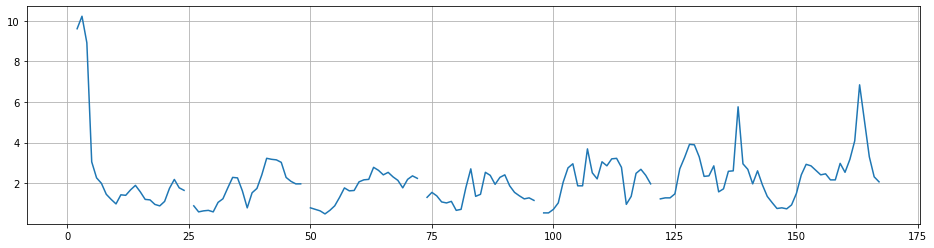

In [59]:
# 1. heti szén-monoxid koncentráció.
df[:168]['co'].plot(figsize=(16, 4), grid=True)

In [80]:
# A date oszlop konvertálása datetime típusúvá.
import datetime

# 1. megoldás
def parse_date_1(dstr):
    return datetime.datetime.strptime(dstr, '%d/%m/%Y %H:%M')

# 2. megoldás
def parse_date_2(dstr):  
    dmy, hm = dstr.split()
    d, mo, y = dmy.split('/')
    h, mi = hm.split(':')
    return datetime.datetime(int(y), int(mo), int(d), int(h), int(mi))

df['date2'] = df['date'].apply(parse_date_1)

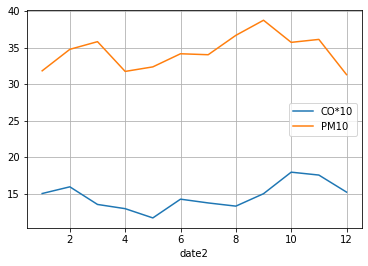

In [94]:
# Átlagos szén-monoxid ill. szálló por (PM10) koncentráció az év hónapjaiban!
import matplotlib.pyplot as plt
(df['co'].groupby(df['date2'].dt.month).mean() * 10).plot() 
df['pm10'].groupby(df['date2'].dt.month).mean().plot(grid=True)
plt.legend(['CO*10', 'PM10'])

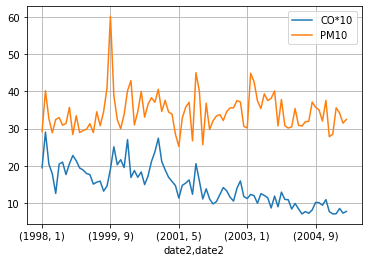

In [101]:
# ...ha nem szeretnénk a különböző évek hónapjait összevonni.
gb = [df['date2'].dt.year, df['date2'].dt.month] # csoporttosítsunk év ÉS hónap szerint
(df['co'].groupby(gb).mean() * 10).plot()
df['pm10'].groupby(gb).mean().plot(grid=True)
plt.legend(['CO*10', 'PM10'])

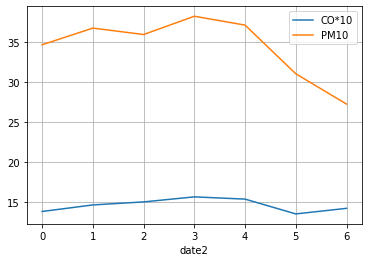

In [104]:
# Átlagos szén-monoxid ill. szálló por (PM10) koncentráció a hét napjain!
gb = df['date2'].dt.weekday
(df['co'].groupby(gb).mean() * 10).plot()
df['pm10'].groupby(gb).mean().plot(grid=True)
plt.legend(['CO*10', 'PM10'])